In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

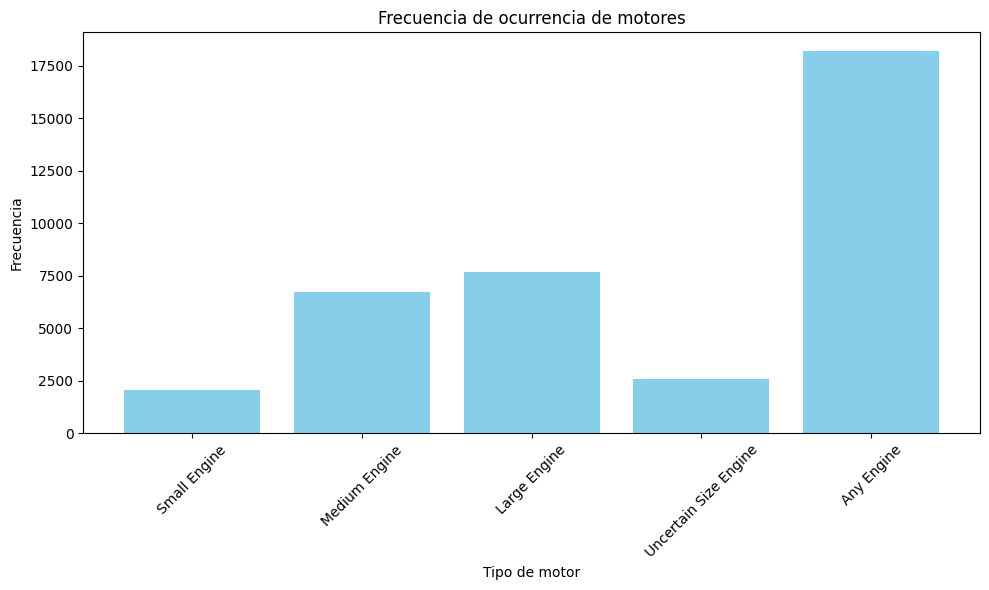

In [8]:
# Leer los archivos CSV
df = pd.read_csv('NYC_sonidos.csv')

# Calcular la frecuencia de ocurrencia de cada tipo de motor
freq_small_engine = df['1-1_small-sounding-engine_presence'].sum()
freq_medium_engine = df['1-2_medium-sounding-engine_presence'].sum()
freq_large_engine = df['1-3_large-sounding-engine_presence'].sum()
freq_uncertain_engine = df['1-X_engine-of-uncertain-size_presence'].sum()
freq_any_engine = df['1_engine_presence'].sum()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))

# Etiquetas de los tipos de motor
labels = ['Small Engine', 'Medium Engine', 'Large Engine', 'Uncertain Size Engine', 'Any Engine']

# Frecuencias de ocurrencia de los tipos de motor
frequencies = [freq_small_engine, freq_medium_engine, freq_large_engine, freq_uncertain_engine, freq_any_engine]

# Graficar
plt.bar(labels, frequencies, color='skyblue')

# Añadir título y etiquetas
plt.title('Frecuencia de ocurrencia de motores')
plt.xlabel('Tipo de motor')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


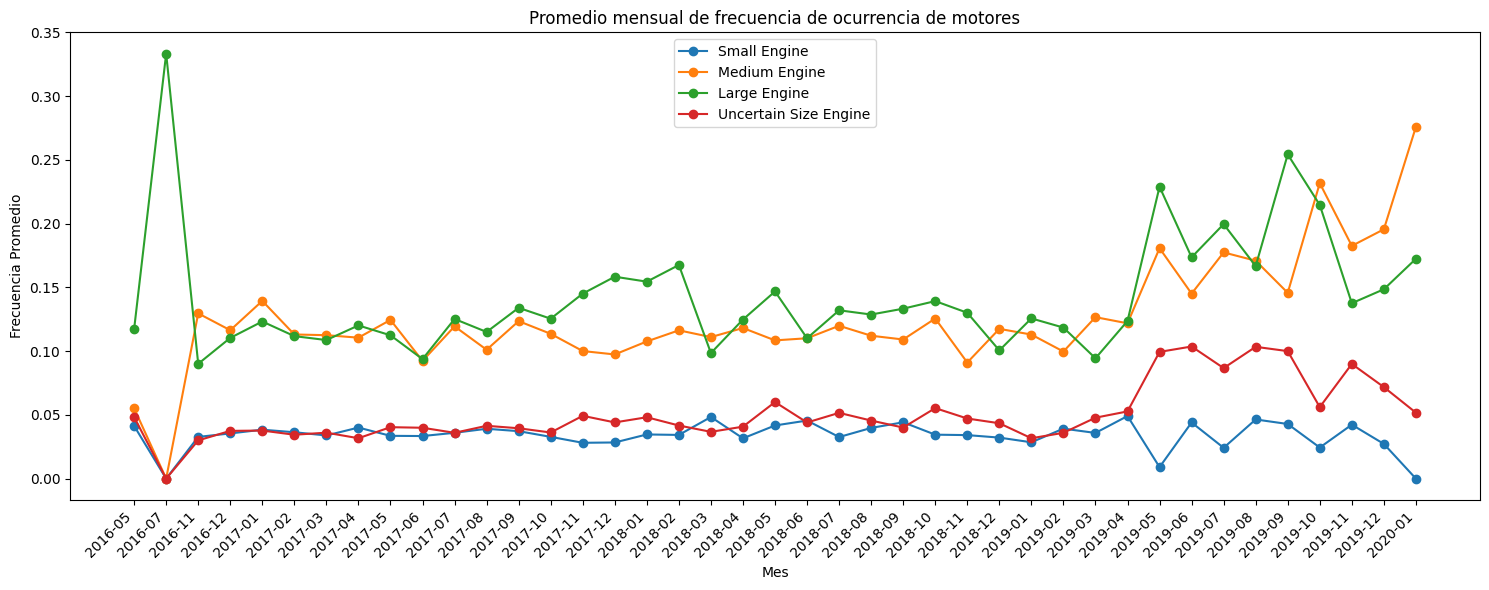

In [16]:
# Leer los archivos CSV
df = pd.read_csv('NYC_sonidos.csv')

# Convertir la columna 'fecha' a formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Agregar una nueva columna para el mes
df['mes'] = df['fecha'].dt.to_period('M')

# Calcular el promedio mensual de la frecuencia de ocurrencia de cada tipo de motor
avg_freq_small_engine = df.groupby('mes')['1-1_small-sounding-engine_presence'].mean()
avg_freq_medium_engine = df.groupby('mes')['1-2_medium-sounding-engine_presence'].mean()
avg_freq_large_engine = df.groupby('mes')['1-3_large-sounding-engine_presence'].mean()
avg_freq_uncertain_engine = df.groupby('mes')['1-X_engine-of-uncertain-size_presence'].mean()

# Crear un gráfico de líneas
plt.figure(figsize=(15, 6))

# Graficar el promedio mensual de la frecuencia de ocurrencia de cada tipo de motor
plt.plot(avg_freq_small_engine.index.astype(str), avg_freq_small_engine, label='Small Engine', marker='o')
plt.plot(avg_freq_medium_engine.index.astype(str), avg_freq_medium_engine, label='Medium Engine', marker='o')
plt.plot(avg_freq_large_engine.index.astype(str), avg_freq_large_engine, label='Large Engine', marker='o')
plt.plot(avg_freq_uncertain_engine.index.astype(str), avg_freq_uncertain_engine, label='Uncertain Size Engine', marker='o')

# Añadir título y etiquetas
plt.title('Promedio mensual de frecuencia de ocurrencia de motores')
plt.xlabel('Mes')
plt.ylabel('Frecuencia Promedio')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Ajustar la rotación y alineación de las etiquetas del eje x
plt.tight_layout()
plt.show()


El gráfico de líneas proporciona una visualización clara y concisa del comportamiento de los ruidos emitidos por vehículos en la ciudad de Nueva York a lo largo del tiempo. Observamos que la frecuencia promedio de ocurrencia de los diferentes tipos de motores varía mensualmente, lo que sugiere fluctuaciones en la actividad vehicular y posiblemente en los patrones de tráfico en la ciudad. Este análisis nos ayuda a comprender mejor la dinámica del ruido urbano y puede ser útil para identificar tendencias a lo largo del tiempo y desarrollar estrategias efectivas para la gestión del ruido en áreas urbanas.

### cantidad de ruido por barrio 

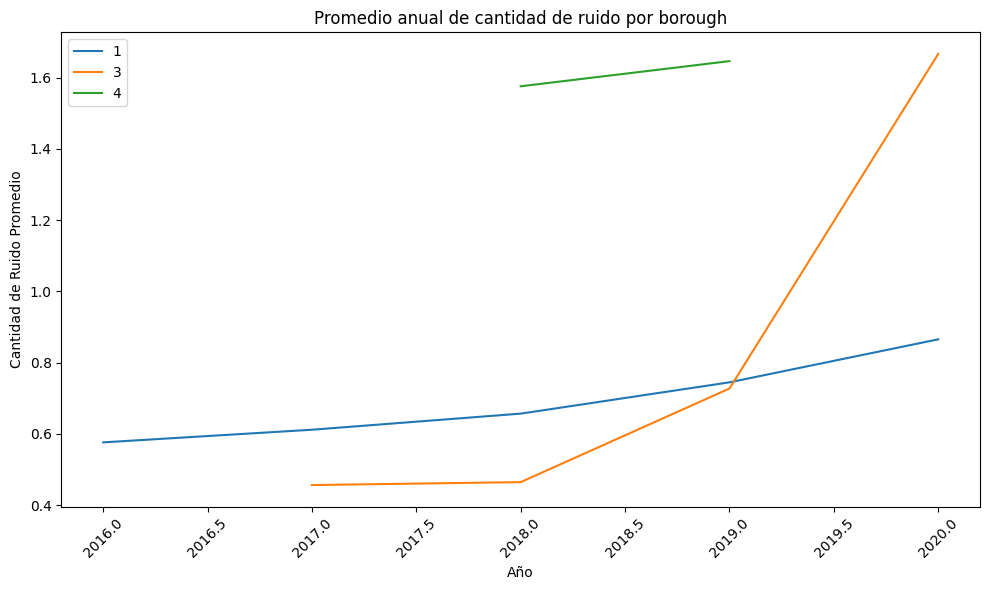

In [19]:
# Leer el archivo CSV
df = pd.read_csv('NYC_sonidos.csv')

# Calcular la cantidad total de ruido sumando la presencia de cada tipo de ruido
df['cantidad_de_ruido'] = df.iloc[:, 5:10].sum(axis=1)

# Agregar una nueva columna para el año
df['año'] = pd.to_datetime(df['fecha']).dt.year

# Calcular el promedio anual de la cantidad de ruido por 'borough'
avg_noise_by_borough = df.groupby(['borough', 'año'])['cantidad_de_ruido'].mean().reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))

# Graficar el promedio anual de la cantidad de ruido por 'borough'
for borough in avg_noise_by_borough['borough'].unique():
    data = avg_noise_by_borough[avg_noise_by_borough['borough'] == borough]
    plt.plot(data['año'], data['cantidad_de_ruido'], label=borough)

# Añadir título y etiquetas
plt.title('Promedio anual de cantidad de ruido por borough')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ruido Promedio')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
